In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score,f1_score,classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.cross_validation import KFold

In [2]:
# Loading the data
data = pd.read_csv("marketing-data.csv")
print data.head()
data.shape

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome is_success  
0  unknown    5   may       261         1     -1         0  unknown         no  
1  unknown    5   may       151         1     -1         0  unknown         no  
2  unknown    5   may        76         1     -1         0  unknown         no  
3  unknown    5   may        92         1     -1         0  unknown         no  
4  unknown    5   may       198         1     -1         0  unknown         no  


(45211, 17)

In [17]:
print data.isnull().sum()
#Checking classses in each feature
dd = ['job','marital','education','default','housing','loan','contact','pdays','previous','poutcome','is_success']
for i in dd:
    print i
    print data[i].value_counts()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
is_success    0
dtype: int64
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
default
no     44396
yes      815
Name: default, dtype: int64
housing
yes    25130
no     20081
Name: housing, dtype: int64
loan
no     37967
yes     7244
Name: loan, dtype: int64
contact
cellular     29285
unknown   

The datasets has no null values.

## Exploratory Data Analysis

In [12]:
#To convert yes-no into 0/1 feature set.
le = LabelEncoder()
le = le.fit(data['is_success'])
data['is_success'] = le.transform(data['is_success'])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


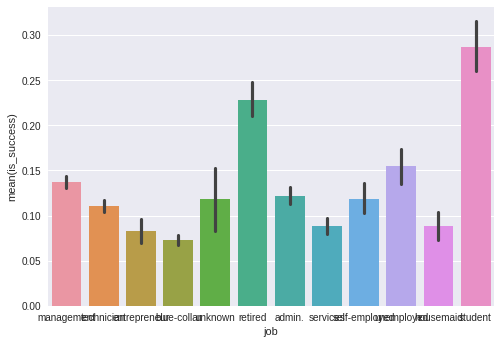

In [13]:
sns.barplot(x = 'job',y='is_success',data=data)
plt.show()

Above Graph shows that the students and retired people are the major subscriptions and blue-collar professionals are least subscribed.  
Getting the same data in a table

In [14]:
accurate= data[["job", "is_success"]].groupby(['job'], as_index=False).mean().sort_values(by='is_success', ascending=False)
print accurate

              job  is_success
8         student    0.286780
5         retired    0.227915
10     unemployed    0.155027
4      management    0.137556
0          admin.    0.122027
6   self-employed    0.118429
11        unknown    0.118056
9      technician    0.110570
7        services    0.088830
3       housemaid    0.087903
2    entrepreneur    0.082717
1     blue-collar    0.072750


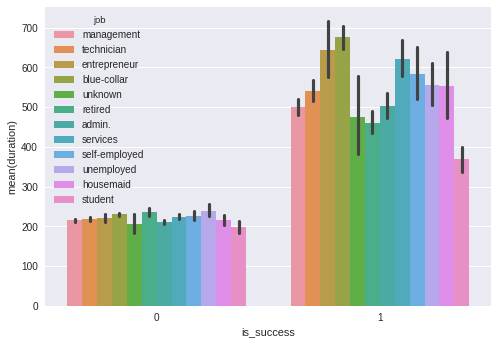

In [15]:
sns.barplot(x="is_success",y="duration",hue='job',data=data)
plt.show()

This graph shows that the people interested in taking loan have higher duration time.

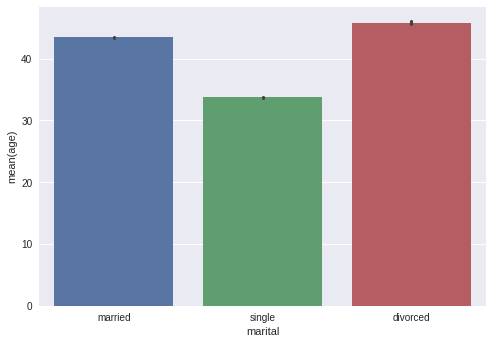

In [16]:
sns.barplot(x='marital',y = 'age',data =data)
plt.show()

This is a general graph showing the age of married, single and divorced people

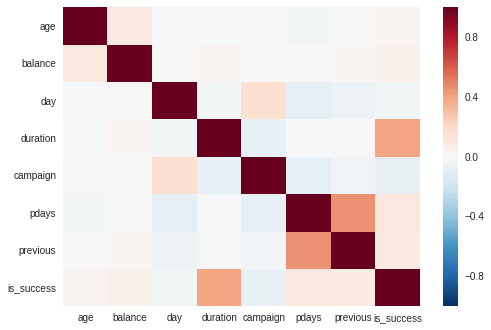

In [17]:
## Looking for highly correlated features
corr = data.corr()
sns.heatmap(corr)
plt.show()

The above graph is missing some variables, after passing the variables from label encoder, it will graph all the features, as mentioned below.

From the graph it is clearly visible that duration have a strong correlation with the output, hence it is an important feature


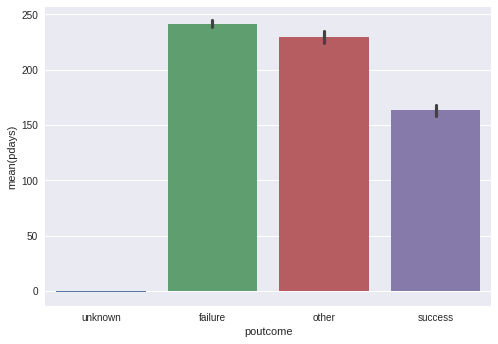

In [18]:
sns.barplot(x='poutcome',y='pdays',data=data)
plt.show()


This graph shows that the people who did not subscribe on previous outcome, had maximum time from last contacted
This conclusion can also be seen from correlation graph plotted below.

In [19]:
#used Label encoder for converting features into numerical values
features = ("age","job","marital","is_success","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome")
for feature in features:
    le = LabelEncoder()
    le = le.fit(data[feature])
    data[feature] = le.transform(data[feature])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


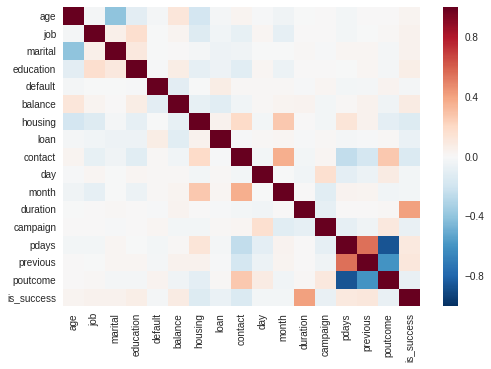

In [20]:
corr = data.corr()
sns.heatmap(corr)
plt.show()

This analysis can help us decide if we can drop some
columns depending upon its correlation with the outcome variable. 

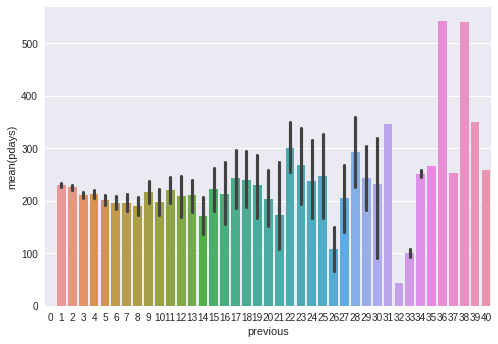

In [21]:
sns.barplot(x='previous',y='pdays',data=data)
plt.show()

## Feature engineering
1. We can change 'balance' and 'age' features into categorical values, by making bins and using cut function in pandas as shown.
2. Changing into categorical values might help the classifier to predict in less time but may reduce the accuracy

In [22]:
#changed 'age' feature into categorical value
#but changing this feature may reduce the accuracy
data['age'] = data.age.fillna(-0.5)
bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
categories = pd.cut(data.age, bins, labels=group_names)
data['age'] = categories

In [23]:
#passing age to label encoder
le = LabelEncoder()
le = le.fit(data['age'])
data['age'] = le.transform(data['age'])
data.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
0,0,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,7,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,5,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,7,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,5,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


## Feature importance
Using xgboost to get a preliminary list of features sorted by their importance.

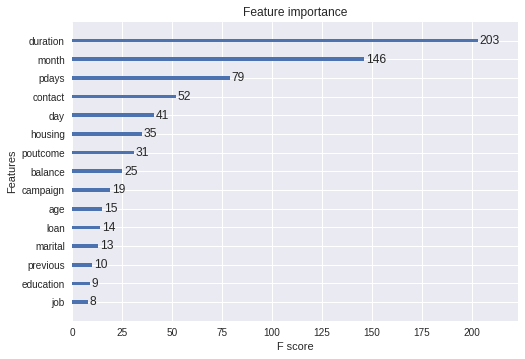

In [24]:
#plotting feature importance! by using Xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
# split data into X and y
X = data.drop('is_success',axis=1)
y = data["is_success"]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

Plotting feature importance graph using boosting, tree based classifier can easily detect the feature importance as it splits the node which have maximum information gain or minimum entropy. 

## Approach used in this data set
Due to high class imbalance, we cannot directly use algorithm. The classifier will learn the majority class, and will show high accuracy on training but will not generalise well to test set. We have the option of using SVM and Neural networks but since most of the features are categorical, decision tree based models are a better choice.
1. To handle highly skewed data set, I have used Stacking with Random forest classifier and to increase generalizibility, I have used cross validation to tweak hyperparameter and to make the model better.
2. We cannot directly apply random forest to the data set as it is the drawback of this algorithm that it cannot make good predictions in highly skewed data set. Under-sampling is used to counter this.
3. For stacking, we need a stack data and a test data from the data.
4. After drawing stack, count of 'yes or 1' in test data is around 3289 and the count of 'no or 0' is 39922.
5. I have made 7 models in which 'yes' class is set to 3200 samples, and 'no' class is set to 3000 samples which are sampled from every next consecutive 5000 thousand samples and concatenated in the  dataset. So, we have 7 datasets each having 6200 samples with 'yes' class 3200 and 3000 samples with 'no' class.
6. Used random forest and set the hyper parameter, searched for best estimator by using randomized search cross validation and fit the 'models' from this on the data set.
7. We don't need the prediction values of these models, but I have predicted on the test data set to check the performance of individual models.
8. After training these models, we will have our 7 models, now using these models, we will predict the values from stack data and make a data frame of these predicted values on stack data. So 7 models, hence there will 7 columns where each column having predicted value of stack data.
9. This dataframe will now be the features and the dependent variable for this data frame will the output class of stack data.
10. From here we will build our final 'model' by stacking the individual models.
11. Now we have made the model, we need the predicted values of the test data, which we need in every machine learning algorithm.
12. From the test data which i earlier drawn from the data set, we will predict values from each model on the test set
and make a dataframe of it and the dependent variable of it would be the output class of test set
13. Here we have our final data set and we will predict the values from the final model we made and take the accuracy score
14. accuracy score is good enough for this classification as it have only 2 classes.

In [25]:
#used undersampling with Stacking for this data set
#as it shows that the data is highly skewed
#simply putting algorithms will shows the score around 90% or more but it will be not generalized, because maximum clients said NO
#so it will learn the same value.
sub = data[data["is_success"]==1]
unsub = data[data["is_success"]==0]
print sub.shape
print unsub.shape

(5289, 17)
(39922, 17)


In [26]:
#picking out the stack data and test data
yesstack = sub.iloc[4289:5289]
nostack = unsub.iloc[38922:39922]
yestest = sub.iloc[3289:4289]
notest = unsub.iloc[37922:38922]

In [27]:
testdata= pd.concat([yestest,notest])
Xtest = testdata.drop("is_success",axis=1)
Ytest = testdata["is_success"]
print testdata.shape

(2000, 17)


In [28]:
#Model 1
#we dont use train_test_split function because it will split the concatenated dataset and test it on same.
unsub1 = unsub.iloc[:5000]
unsub1 = unsub1.sample(frac=0.6)
sub1 = sub.iloc[:3200]
print sub1.shape
print unsub1.shape
data1 = pd.concat([sub1,unsub1])
data1.shape
x1 = data1.drop("is_success",axis=1)
y1 = data1["is_success"]
#xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,test_size = 0.3,random_state = 42)
parameters = {'n_estimators':[3,4,5,6,7,8,9,10,100,150,500,1000], 'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5]} #parameters always are given in dictionary, if not then the model will be unable to understand that to which class it belongs ie. (n_estimators, criterion, max_depth)
clf1 = RandomForestClassifier()
kfold = 10
iters = 10
grid1 = RandomizedSearchCV(clf1,parameters,cv=kfold,n_iter=iters)#used randomized search cross validation which gives the best model, we can use grid search but using it, it will consume more time, as it will check all the parameters, randomized search will randomly choose parameters by giving value n_iters 
grid1.fit(x1,y1)
clf1 = grid1.best_estimator_
clf1.fit(x1,y1)
ypredict= clf1.predict(Xtest) #it is not necessary to predict, we just want the models from these sampled dataset
accuracy_score(Ytest,ypredict)#we are predicting just to check if model is working  properly

(3200, 17)
(3000, 17)


0.499

In [29]:
#Model 2
unsub2 = unsub.iloc[5000:10000]
unsub2 = unsub2.sample(frac=0.6)
sub2 = sub.iloc[:3200]
print sub2.shape
print unsub2.shape
data2 = pd.concat([sub2,unsub2])
data2.shape
x2 = data2.drop("is_success",axis=1)
y2 = data2["is_success"]
#xtrain,xtest,ytrain,ytest = train_test_split(x2,y2,test_size = 0.3,random_state = 42)
parameters = {'n_estimators':[3,4,5,6,7,8,9,10,100,150,500,1000], 'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5]}
clf2 = RandomForestClassifier()
iters = 10
grid2 = RandomizedSearchCV(clf2,parameters,cv=10,verbose=1,n_iter=iters)
grid2.fit(x2,y2)
clf2 = grid2.best_estimator_
clf2.fit(x2,y2)
ypredict2 = clf2.predict(Xtest)
accuracy_score(Ytest,ypredict2)

(3200, 17)
(3000, 17)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.1min finished


0.4995

In [30]:
data2.shape

(6200, 17)

In [31]:
#Model 3
unsub3 = unsub.iloc[10000:15000]
unsub3 = unsub3.sample(frac=0.6)
sub3 = sub.iloc[:3200]
print sub3.shape
print unsub3.shape
data3 = pd.concat([sub3,unsub3])
data3.shape
x3 = data3.drop("is_success",axis=1)
y3 = data3["is_success"]
#xtrain,xtest,ytrain,ytest = train_test_split(x3,y3,test_size = 0.3,random_state = 42)
parameters = {'n_estimators':[3,4,5,6,7,8,9,10,100,150,500,1000], 'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5]}
clf3 = RandomForestClassifier()
iters = 10
grid3 = RandomizedSearchCV(clf3,parameters,cv=10,verbose=1,n_iter=iters)
grid3.fit(x3,y3)
clf3 = grid3.best_estimator_
clf3.fit(x3,y3)
ypredict3 = clf3.predict(Xtest)
accuracy_score(Ytest,ypredict3)

(3200, 17)
(3000, 17)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


0.502

In [32]:
#Model 4
unsub4 = unsub.iloc[15000:20000]
unsub4 = unsub4.sample(frac=0.6)
sub4 = sub.iloc[:3200]
print sub4.shape
print unsub4.shape
data4 = pd.concat([sub4,unsub4])
data4.shape
x4 = data4.drop("is_success",axis=1)
y4 = data4["is_success"]
#xtrain,xtest,ytrain,ytest = train_test_split(x4,y4,test_size = 0.3,random_state = 42)
parameters = {'n_estimators':[3,4,5,6,7,8,9,10,100,150,500,1000], 'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5]}
clf4 = RandomForestClassifier()
iters = 10
grid4 = RandomizedSearchCV(clf4,parameters,cv=10,verbose=1,n_iter=iters)
grid4.fit(x4,y4)
clf4 = grid4.best_estimator_
clf4.fit(x4,y4)
ypredict4 = clf4.predict(Xtest)
accuracy_score(Ytest,ypredict4)

(3200, 17)
(3000, 17)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   50.2s finished


0.52149999999999996

In [33]:
#Model 5
unsub5 = unsub.iloc[20000:25000]
unsub5 = unsub5.sample(frac=0.6)
sub5 = sub.iloc[2289:5289]
print sub5.shape
print unsub5.shape
data5 = pd.concat([sub5,unsub5])
data5.shape
x5 = data5.drop("is_success",axis=1)
y5 = data5["is_success"]
#xtrain,xtest,ytrain,ytest = train_test_split(x5,y5,test_size = 0.3,random_state = 42)
parameters = {'n_estimators':[3,4,5,6,7,8,9,10,100,150,500,1000], 'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5]}
clf5 = RandomForestClassifier()
iters = 10
grid5 = RandomizedSearchCV(clf5,parameters,cv=10,verbose=1,n_iter=iters)
grid5.fit(x5,y5)
clf5 = grid5.best_estimator_
clf5.fit(x5,y5)
ypredict5 = clf5.predict(Xtest)
accuracy_score(Ytest,ypredict5)

(3000, 17)
(3000, 17)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.4min finished


0.53549999999999998

In [34]:
#Model 6
unsub6 = unsub.iloc[25000:30000]
unsub6 = unsub6.sample(frac=0.6)
sub6 = sub.iloc[2289:5289]
print sub6.shape
print unsub6.shape
data6 = pd.concat([sub6,unsub6])
data6.shape
x6 = data6.drop("is_success",axis=1)
y6 = data6["is_success"]
#xtrain,xtest,ytrain,ytest = train_test_split(x6,y6,test_size = 0.3,random_state = 42)
parameters = {'n_estimators':[3,4,5,6,7,8,9,10,100,150,500,1000], 'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5]}
clf6 = RandomForestClassifier()
iters = 10
grid6 = RandomizedSearchCV(clf6,parameters,cv=10,verbose=1,n_iter=iters)
grid6.fit(x6,y6)
clf6 = grid6.best_estimator_
clf6.fit(x6,y6)
ypredict6 = clf6.predict(Xtest)
accuracy_score(Ytest,ypredict6)

(3000, 17)
(3000, 17)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished


0.60550000000000004

In [35]:
#Model 7
unsub7 = unsub.iloc[30000:37900]
unsub7 = unsub7.sample(frac=0.6)
sub7 = sub.iloc[2289:5289]
print sub7.shape
print unsub7.shape
data7 = pd.concat([sub7,unsub7])
data7.shape
x7 = data7.drop("is_success",axis=1)
y7 = data7["is_success"]
#xtrain,xtest,ytrain,ytest = train_test_split(x7,y7,test_size = 0.3,random_state = 42)
parameters = {'n_estimators':[3,4,5,6,7,8,9,10,100,150,500,1000], 'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5]}
clf7 = RandomForestClassifier()
iters = 10
grid7 = RandomizedSearchCV(clf7,parameters,cv=10,verbose=1,n_iter=iters)
grid7.fit(x7,y7)
clf7 = grid7.best_estimator_
clf7.fit(x7,y7)
abc = clf7.predict(Xtest)
accuracy_score(abc,Ytest)

(3000, 17)
(4740, 17)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   44.6s finished


0.54500000000000004

In [36]:
#making stack data
stackdata = pd.concat([yesstack,nostack])
stackdata.shape

(2000, 17)

In [37]:
#used every model and predict values on stack data
# now the predicted values are the features and output of Ystack is the output
# we will make a final model on this data set
# 7 models thus 7 features and 1 output value
Xstack = stackdata.drop("is_success",axis=1)
Ystack = stackdata["is_success"]
Xstack.shape
f1 = clf1.predict(Xstack)
f1 = pd.DataFrame(f1)
f2 = clf2.predict(Xstack)
f2 = pd.DataFrame(f2)
f3 = clf3.predict(Xstack)
f3 = pd.DataFrame(f3)
f4 = clf4.predict(Xstack)
f4 = pd.DataFrame(f4)
f5 = clf5.predict(Xstack)
f5 = pd.DataFrame(f5)
f6 = clf6.predict(Xstack)
f6 = pd.DataFrame(f6)
f7 = clf7.predict(Xstack)
f7 = pd.DataFrame(f7)

Xtrain = pd.concat([f1,f2,f3,f4,f5,f6,f7],axis=1)
print Xtrain.shape
print Ystack.shape
clffinal = RandomForestClassifier()
iters = 10
parameters = {'n_estimators':[3,4,5,6,7,8,9,10,100,150,500,1000], 'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5]}
gridfinal = RandomizedSearchCV(clffinal,parameters,verbose=1,n_iter=iters)
gridfinal.fit(Xtrain,Ystack)
clffinal = gridfinal.best_estimator_
clffinal.fit(Xtrain,Ystack)

(2000, 7)
(2000,)
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   28.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [38]:
#here we will use the predcited values of Xtest from our previous models

f11 = clf1.predict(Xtest)
f11 = pd.DataFrame(f11)

f22 = clf2.predict(Xtest)
f22 = pd.DataFrame(f22)

f33 = clf3.predict(Xtest)
f33 = pd.DataFrame(f33)

f44 = clf4.predict(Xtest)
f44 = pd.DataFrame(f44)

f55 = clf5.predict(Xtest)
f55 = pd.DataFrame(f55)

f66 = clf6.predict(Xtest)
f66 = pd.DataFrame(f66)

f77 = clf7.predict(Xtest)
f77 = pd.DataFrame(f77)
#making a dataframe and these are the features
xf = [f11,f22,f33,f44,f55,f66,f77]
xfeatures = pd.concat(xf,axis=1)
predicty = clffinal.predict(xfeatures)
print classification_report(Ytest,predicty)
print f1_score(Ytest,predicty), 'F1 score'
print accuracy_score(Ytest,predicty) ,'Accuracy score'

             precision    recall  f1-score   support

          0       0.67      0.39      0.49      1000
          1       0.57      0.81      0.67      1000

avg / total       0.62      0.60      0.58      2000

0.666942833471 F1 score
0.598 Accuracy score


## Conclusion : 
1. The accuracy of final model is around 59.8% which is better than accuracy of individual models. Similarly, F1 score of 65.4% is better than those of individual models.
2. accuracy achieved without changing 'age' feature is 62%
2. Further work can be done on the problem by engineering new features.
3. Different types of classifiers can be tried in addition to random forest.
    